In [1]:
# importing all the data VISUALIZATION libraries
# import matplotlib for data visualization
import matplotlib.pyplot as plt
import matplotlib.style as style 
# import seaborn for data visualization
import seaborn as sns

# import pandas for data manipulation
import pandas as pd

# import glob for reading all the files in a folder
import glob

# set the path to the data folder
data_folder = r'C:\Users\saket\Downloads\Compressed\spotify data\MyData'

# make a dataframe from the song_details.json file
song_details = pd.read_json(r'C:\Users\saket\Downloads\Compressed\spotify data\MyData\song_details.json')


In [2]:
# create a empty dataframe called endsong
endsong = pd.DataFrame()

# loop through each file with the name endsong_*.json
for file in glob.glob(data_folder + r'\endsong_*.json'):
    # add all the files to the endsong dataframe use pd.concat
    endsong = pd.concat([endsong, pd.read_json(file)])

# 'ts' column is in ISO 8601 format convert it to datetime
endsong['ts'] = pd.to_datetime(endsong['ts'])

#rename the 'ts' column to 'end_time'
endsong.rename(columns={'ts': 'time'}, inplace=True)

# sort the dataframe by the 'end_time' column
endsong.sort_values(by='time', inplace=True)

# add seconds played column
endsong['seconds_played'] = endsong['ms_played'] / 1000
# remove digits after one decimal place
endsong['seconds_played'] = endsong['seconds_played'].round(1)

endsong.head(3)

,time,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,seconds_played
3744,2019-08-31 04:10:16+00:00,rt47etgc6xpwhhhb8575rth83,"Android-tablet OS 6.0 API 23 (Intex, )",120295,IN,223.187.145.76,unknown,Indeciso,Reik,Indeciso,...,None,None,playbtn,endplay,True,NaN,False,1567221428746,False,120.3
11584,2019-08-31 04:12:25+00:00,rt47etgc6xpwhhhb8575rth83,"Android-tablet OS 6.0 API 23 (Intex, )",102991,IN,223.187.145.76,unknown,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,Carte Blanche,...,None,None,clickrow,endplay,False,NaN,False,1567224614546,False,103.0
11310,2019-08-31 04:12:28+00:00,rt47etgc6xpwhhhb8575rth83,"Android-tablet OS 6.0 API 23 (Intex, )",1815,IN,223.187.145.76,unknown,China,Anuel AA,China,...,None,None,clickrow,endplay,False,NaN,False,1567224744221,False,1.8


In [3]:
# sum the total time played "ms_played"
total_time_played_in_hr = endsong['ms_played'].sum() / 1000 / 60 / 60

# first date and last date
first_date = endsong['time'].min()
last_date = endsong['time'].max()

# total days
total_days = (last_date - first_date).days

# average time played per day
avg_time_played_per_day = total_time_played_in_hr / total_days

# song played per day
song_played_per_day = endsong.groupby(endsong['time'].dt.date).count()['time']
# time played per day in minutes
time_played_per_day = endsong.groupby(endsong['time'].dt.date).sum()['ms_played'] / 1000 / 60 /60

# MUSIC LISTENING HABITS

Total time played: 3369.61 hours, in 1181 days, average time played per day: 2.85 hours


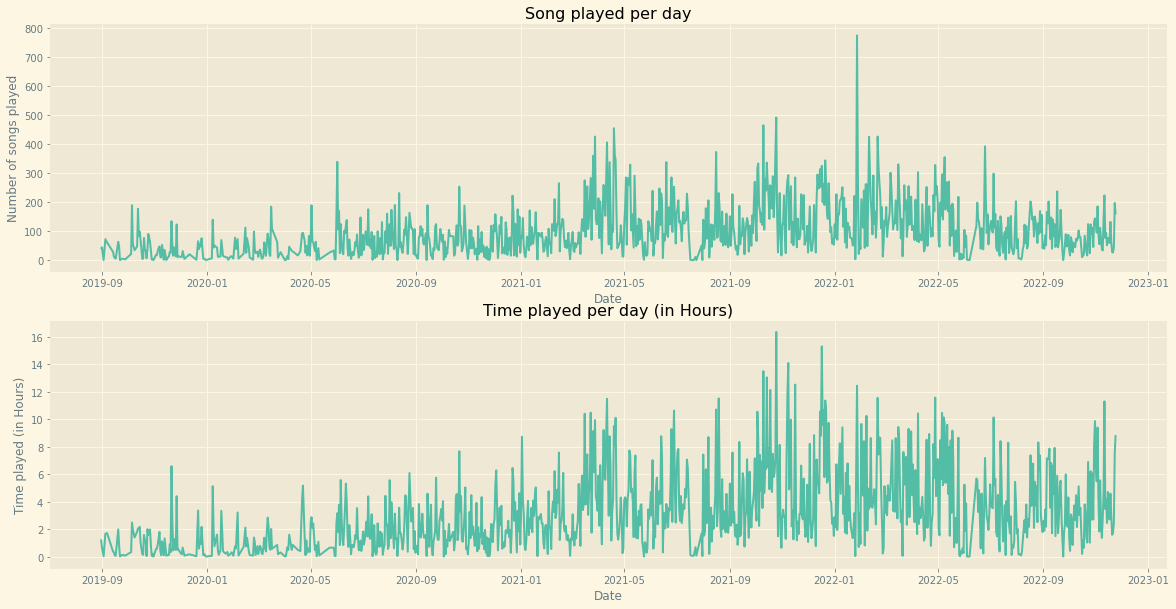

In [4]:
# print the total time played and total days
print(f'Total time played: {total_time_played_in_hr:.2f} hours, in {total_days} days, average time played per day: {avg_time_played_per_day:.2f} hours')

# visualize the song_played_per_day and time_played_per_day
# sns.set_theme()
plt.style.use('Solarize_Light2')
# plt.style.use('dark_background')
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.lineplot(x=song_played_per_day.index, y=song_played_per_day.values, ax=ax[0], color='#53bda5')
sns.lineplot(x=time_played_per_day.index, y=time_played_per_day.values, ax=ax[1], color='#53bda5')
# set the title for the both plots
ax[0].set_title('Song played per day'), ax[1].set_title('Time played per day (in Hours)')
# X and Y labels for the first plot
ax[0].set_xlabel('Date'), ax[0].set_ylabel('Number of songs played')
# X and Y labels for the second plot
ax[1].set_xlabel('Date'), ax[1].set_ylabel('Time played (in Hours)')
plt.show()

# MOST PLAYED ARTIST EACH YEAR

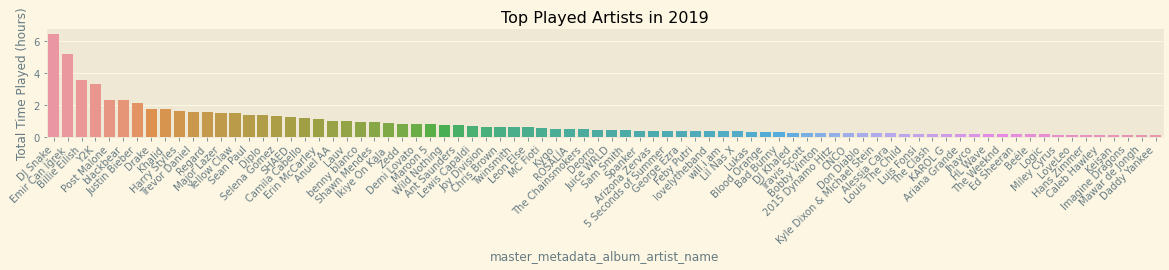

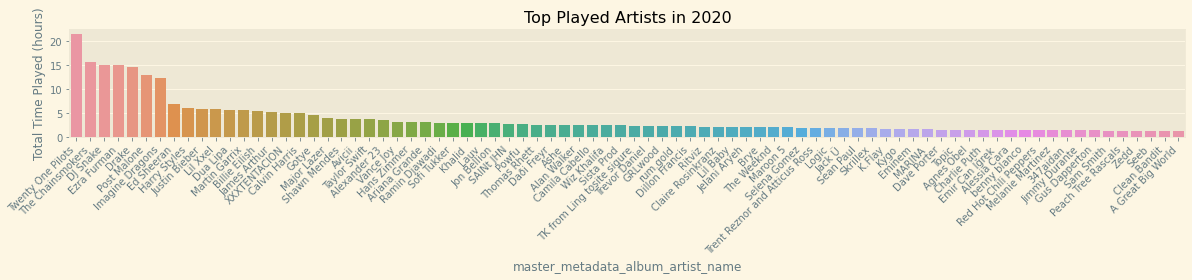

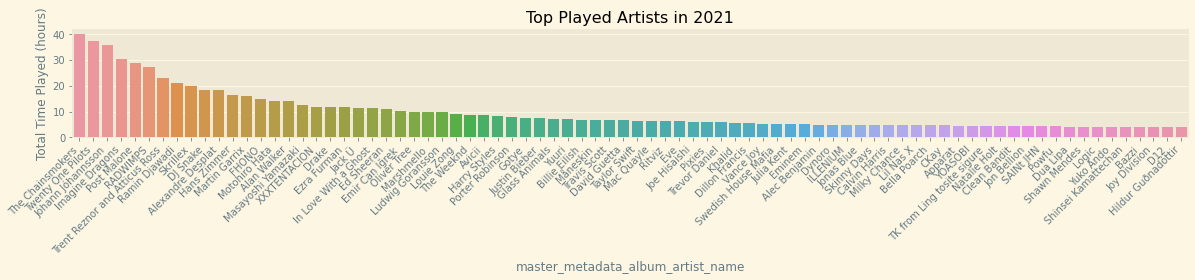

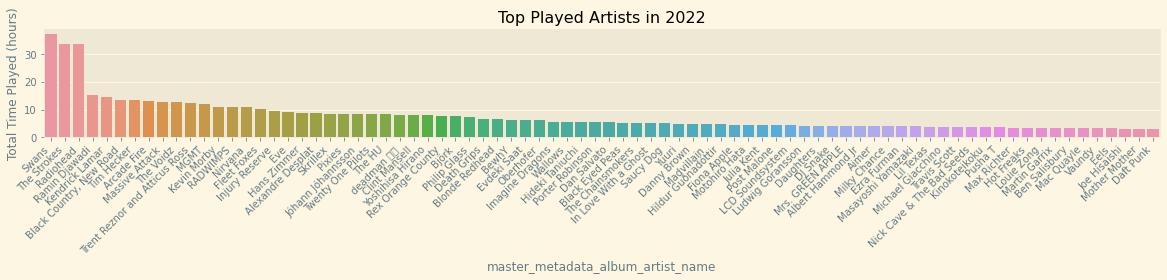

In [60]:

endsong['time'] = pd.to_datetime(endsong['time'])
endsong['year'] = endsong['time'].dt.year

# To ignore the warning
import warnings
warnings.filterwarnings("ignore", message="Glyph .+? missing from current font.")

# Iterate over each year and create a bar chart for the top 100 artists
for year in sorted(endsong['year'].unique()):
    top_artists = endsong.loc[endsong['year'] == year].groupby('master_metadata_album_artist_name')['ms_played'].sum().reset_index()
    top_artists['hours_played'] = top_artists['ms_played'] / 3600000  # Convert ms_played to hours_played
    top_artists = top_artists.sort_values('hours_played', ascending=False).head(80)

    # Create a bar chart
    plt.figure(figsize=(20, 2))
    plt.title(f'Top Played Artists in {year}')
    sns.barplot(x='master_metadata_album_artist_name', y='hours_played', data=top_artists)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Total Time Played (hours)')

# MOST PLAYED SONGS EACH YEAR

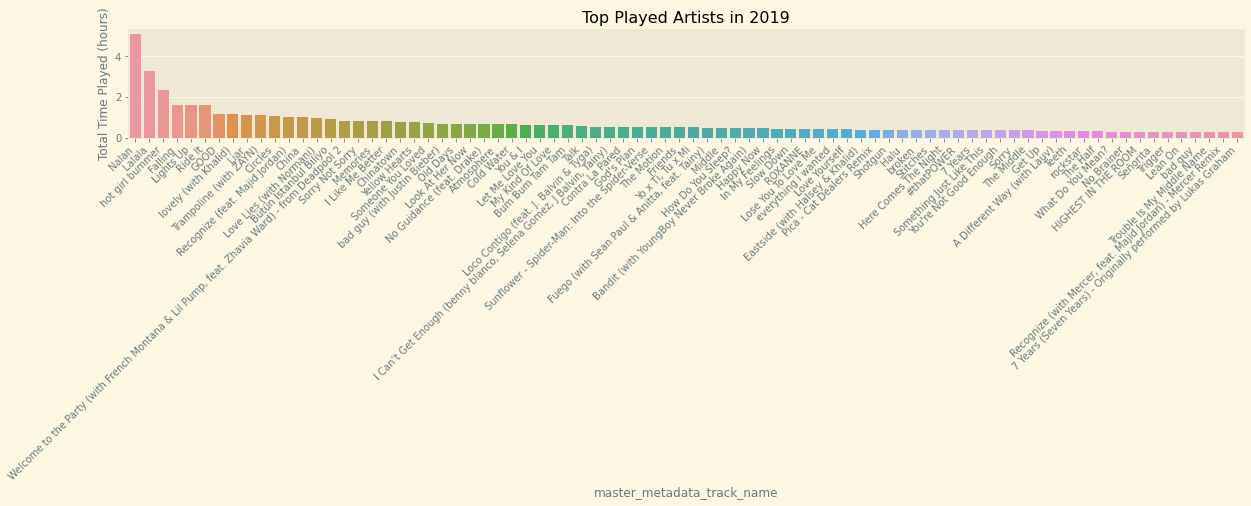

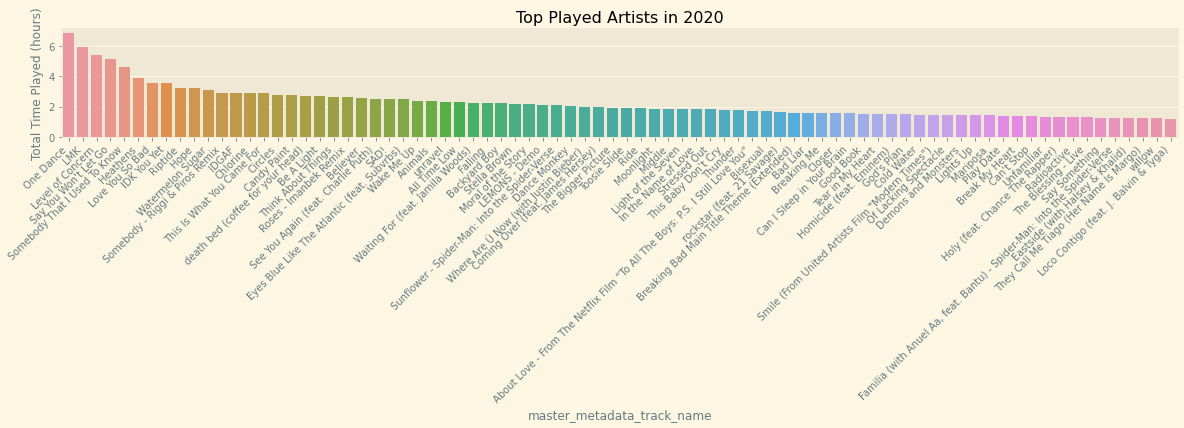

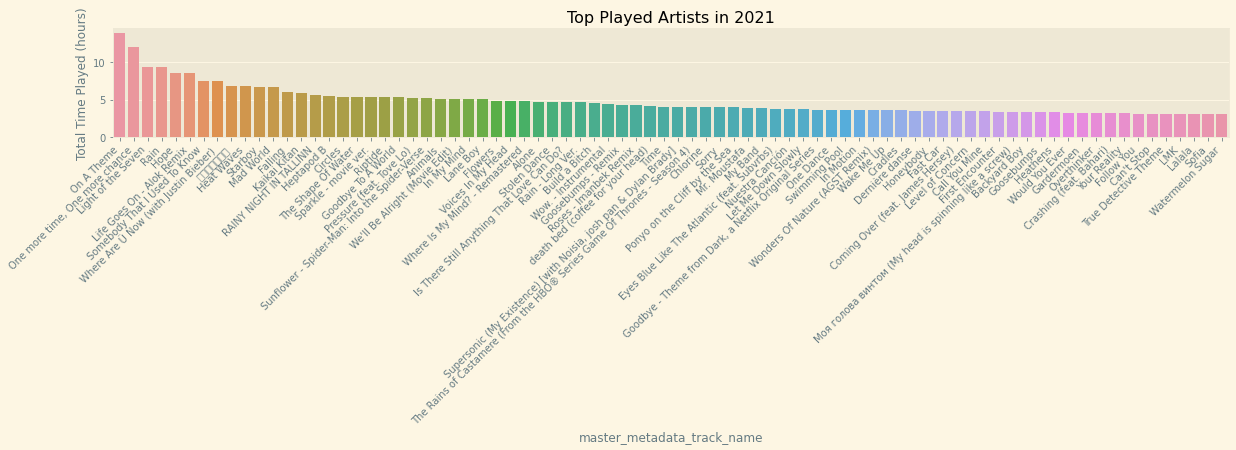

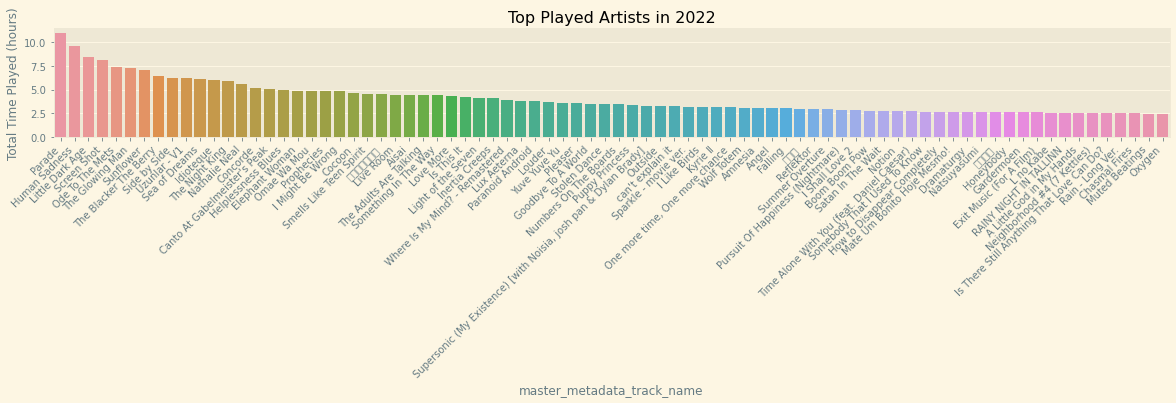

In [62]:

# Iterate over each year and create a bar chart for the top 100 artists
for year in sorted(endsong['year'].unique()):
    top_artists = endsong.loc[endsong['year'] == year].groupby('master_metadata_track_name')['ms_played'].sum().reset_index()
    top_artists['hours_played'] = top_artists['ms_played'] / 3600000  # Convert ms_played to hours_played
    top_artists = top_artists.sort_values('hours_played', ascending=False).head(80)

    # Create a bar chart
    plt.figure(figsize=(20, 2))
    plt.title(f'Top Played Artists in {year}')
    sns.barplot(x='master_metadata_track_name', y='hours_played', data=top_artists)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Total Time Played (hours)')

35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
53


35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
53


KeyboardInterrupt: 

In [34]:
print(song_details.head())
song_details.co

                                               album  \
0  {'album_type': 'album', 'artists': [{'external...   
1  {'album_type': 'single', 'artists': [{'externa...   
2  {'album_type': 'single', 'artists': [{'externa...   
3  {'album_type': 'album', 'artists': [{'external...   
4  {'album_type': 'album', 'artists': [{'external...   

                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
0  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   
1  [AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...            1   
2                                                 []            1   
3  [AD, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB, B.

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'],
      dtype='object')

In [6]:
# print column names
print(df.columns)

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'],
      dtype='object')


,name,popularity
0,Loco Contigo (feat. J. Balvin & Tyga),75
1,China,76
2,Ransom,0
3,Sorry,83
4,Let Me Love You,51
...,...,...
14019,LONG SEASON,44
14020,Red Velvet Corridor,32
14021,I Was a Prisoner in Your Skull,29
14022,Live Through Me,26


In [68]:
# make df out of album column
df_album = pd.DataFrame(df['album'].tolist())
# album name to df_album
df_album['album_name'] = df['name']

# remove unwanted columns
df_album = df_album.drop(['artists', 'available_markets', 'external_urls', 'href', 'id', 'release_date', 'release_date_precision', 'type', 'uri'], axis=1)

df_album.images[0][1]['url']

'https://i.scdn.co/image/ab67616d00001e02caf82abb2338880577e472be'

In [14]:
# all df details
df.info()
df.head()
df.describe()
df.info()
# df['artist'].value_counts().head(10)
# df['artist'].value_counts().tail(10)
# df['artist'].value_counts().head(10).plot(kind='bar')
# df['artist'].value_counts().head(10).plot(kind='barh')
# df['artist'].value_counts().head(10).plot(kind='pie')
# df['artist'].value_counts().head(10).plot(kind='hist')
# df['artist'].value_counts().head(10).plot(kind='box')
# df['artist'].value_counts().head(10).plot(kind='kde')
# df['artist'].value_counts().head(10).plot(kind='area')
# df['artist'].value_counts().head(10).plot(kind='barh')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   album              14024 non-null  object
 1   artists            14024 non-null  object
 2   available_markets  14024 non-null  object
 3   disc_number        14024 non-null  int64 
 4   duration_ms        14024 non-null  int64 
 5   explicit           14024 non-null  bool  
 6   external_ids       14024 non-null  object
 7   external_urls      14024 non-null  object
 8   href               14024 non-null  object
 9   id                 14024 non-null  object
 10  is_local           14024 non-null  bool  
 11  name               14024 non-null  object
 12  popularity         14024 non-null  int64 
 13  preview_url        9514 non-null   object
 14  track_number       14024 non-null  int64 
 15  type               14024 non-null  object
 16  uri                14024 non-null  objec

In [ ]:
# import plotly
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import bokeh
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import ColumnDataSource, HoverTool
# from bokeh.io import output_notebook
# # import cufflinks
# import cufflinks as cf
# # import ggplot
# from plotnine import *
# # import altair
# import altair as alt

# # import pandas
# import pandas as pd

# # import glob to loop through files
# import glob

# cufflinks
# plot the total time played in hours
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)
# endsong['seconds_played'].iplot(kind='bar', xTitle='Total time played', yTitle='Total time played in hours', title='Total time played in hours')

# # create a figure
# fig = go.Figure()

# # add a trace
# fig.add_trace(go.Scatter(x=endsong['ts'], y=endsong['seconds_played']/60/60, mode='markers'))

# # update the layout
# fig.update_layout(title='Time Played', xaxis_title='Date', yaxis_title='Time Played (hour)')

# # show the figure
# fig.show()